In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from src.helper import get_split_data

In [2]:
X_trn, y_trn, X_val, y_val, X_tst, y_tst = get_split_data.split_data_for_training(6)

X = pd.concat([X_trn, X_val], axis='index')
y = pd.Series([*y_trn, *y_val], index=X.index)

In [3]:
from sklearn.metrics import f1_score

xg = xgb.XGBClassifier(random_state=42)
xg.fit(X_trn, y_trn, eval_set=[(X_trn, y_trn), (X_val, y_val)], verbose=False)
y_pred = xg.predict(X_tst)

f1_score(y_tst, y_pred, average='binary').round(3)

np.float64(0.0)

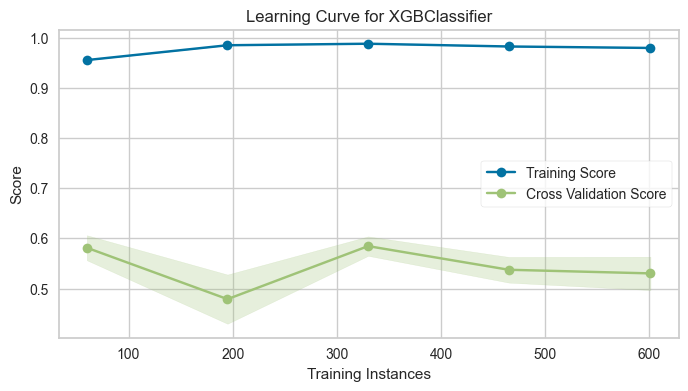

(0.6, 1.0)

In [5]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick.model_selection as ms

params = {'colsample_bytree': 0.8221622008785888,
          'gamma': 1.5156426549101207,
          'learning_rate': 0.13447139288808915,
          'max_depth': 13,
          'n_estimators': 800,
          'reg_alpha': 0.373225949939588,
          'reg_lambda': 0.8454961206356787,
          'subsample': 0.8024583694305072}

tscv = TimeSeriesSplit(n_splits=3)

fig, ax = plt.subplots(figsize=(8, 4))
viz = ms.learning_curve(xgb.XGBClassifier(**params), X, y, cv=tscv, scoring='f1', ax=ax)

ax.set_ylim(0.6, 1)